# View the result of many simulations

In [3]:
import pandas as pd
import numpy as np
import os,sys
import matplotlib.pyplot as plt
from astropy.io import fits

%matplotlib inline
from IPython.display import Image, display
from scipy.interpolate import interp1d

In [4]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

In [149]:
from scipy.stats import norm

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [6]:
#import seaborn as sns

In [7]:
#import statsmodels
#from scipy.stats.stats import pearsonr
#from sklearn.metrics import matthews_corrcoef

In [8]:
#dir(matthews_corrcoef)

In [9]:
from scipy.stats.stats import pearsonr
#help(pearsonr)

In [10]:
from scipy.stats import linregress

# config LSST

In [11]:
all_filternum = {'u':1, 'g':2, 'r':3, 'i':4, 'z':5, 'y':6}
all_filtercolors = {'u':'b', 'g':'g', 'r':'r', 'i':'y', 'z':'grey', 'y':'k'}
all_filtername= ['u','g','r','i','z','y']

In [12]:
NBFILT=len(all_filternum)

# Input Data

In [13]:
path_data="/sps/lsst/data/PCWG_MiniDataChallenge/pickles_uvk/2018-07-08/"

In [14]:
dirs = os.listdir(path_data)

In [15]:
selected_files = []
for thefile in dirs:
    if thefile.find("info")!=-1:
        selected_files.append(thefile)

In [16]:
selected_files.sort()


In [17]:
#selected_files

In [18]:
all_data = []
for thefile in selected_files:
    thefullfilename=os.path.join(path_data,thefile)
    data=np.loadtxt(thefullfilename)
    all_data.append(data)

In [19]:
all_data[0].shape

(912, 8)

In [20]:
sed_idx=0

In [21]:
data=all_data[0]

# data field
| airmass    |    filter(1..6)  |  vaod   |  o3   |   pwv  |   clouds    |    instrum-mag (ADU) |       error-mag |

In [22]:
df=pd.DataFrame(data)

In [23]:
df.columns = ['am', 'f', 'vaod', 'ozone', 'pwv','clouds','mag','magerr']

In [24]:
N_u,N_g,N_r=df["f"][df.f==1].describe()["count"],df["f"][df.f==2].describe()["count"],df["f"][df.f==3].describe()["count"]
N_i,N_z,N_y=df["f"][df.f==4].describe()["count"],df["f"][df.f==5].describe()["count"],df["f"][df.f==6].describe()["count"]


In [25]:
Nobs=np.array([N_u,N_g,N_r,N_i,N_z,N_y])
print(Nobs.sum())

912.0


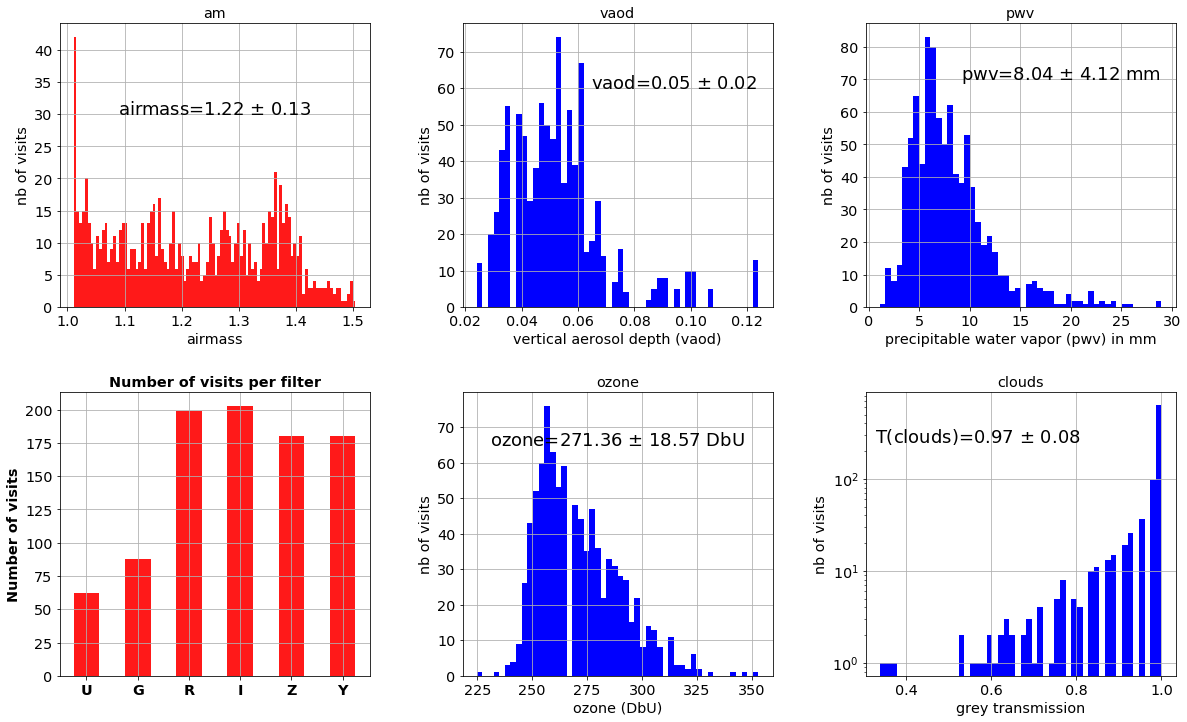

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,12))
#airmasses
#=========
m,sig,zmin,zmax=df["am"].describe()["mean"],df["am"].describe()["std"],df["am"].describe()["min"],df["am"].describe()["max"]
thelabel="airmass={:3.2f} $\pm$ {:3.2f}".format(m,sig)
axarr=df.hist("am",bins=100,color='r',alpha=0.9,label=thelabel,ax=axes[0,0])
#axarr = frame.hist(column='Age', by = 'Survived', sharex=True, sharey=True, layout = (2, 1))
for ax in axarr.flatten():
    ax.set_xlabel("airmass")
    ax.set_ylabel("nb of visits")
    ax.text((zmin+zmax)/2., 30, thelabel, ha='center',fontsize=18)
# VAOD
#=-----
m,sig,amin,amax=df["vaod"].describe()["mean"],df["vaod"].describe()["std"],df["vaod"].describe()["min"],df["vaod"].describe()["max"]
thelabel="vaod={:3.2f} $\pm$ {:3.2f}".format(m,sig)
axarr=df.hist('vaod',bins=50,color='b',ax=axes[0,1])
for ax in axarr.flatten():
    ax.set_xlabel("vertical aerosol depth (vaod)")
    ax.set_ylabel("nb of visits")
    ax.text((amin+amax)/2.+0.02, 60, thelabel, ha='center',fontsize=18)
# PWV
#-----
m,sig,pmin,pmax=df["pwv"].describe()["mean"],df["pwv"].describe()["std"],df["pwv"].describe()["min"],df["pwv"].describe()["max"]
thelabel="pwv={:3.2f} $\pm$ {:3.2f} mm".format(m,sig)
axarr=df.hist('pwv',bins=50,color='b',ax=axes[0,2])
for ax in axarr.flatten():
    ax.set_xlabel("precipitable water vapor (pwv) in mm")
    ax.set_ylabel("nb of visits")
    ax.text((pmin+pmax)/2.+4, 70, thelabel, ha='center',fontsize=18)
# Filter
#------
#axarr=df.hist("f",bins=12,color='r',alpha=0.9,ax=axes[1,0])
#for ax in axarr.flatten():
#    ax.set_xlabel("Filter color")
#    ax.set_ylabel("nb of visits")
#    ax.set_xticks(np.arange(6))
#    ax.set_xticklabels(('U', 'G', 'R', 'I', 'Z','Y'),fontweight='bold')
N_u,N_g,N_r=df["f"][df.f==1].describe()["count"],df["f"][df.f==2].describe()["count"],df["f"][df.f==3].describe()["count"]
N_i,N_z,N_y=df["f"][df.f==4].describe()["count"],df["f"][df.f==5].describe()["count"],df["f"][df.f==6].describe()["count"]
Nobs=np.array([N_u,N_g,N_r,N_i,N_z,N_y])    
ind = np.arange(6)  # the x locations for the groups
width = 0.5  # the width of the bars
ax=axes[1,0]
rects1 = ax.bar(ind , Nobs, width, color='r',alpha=0.9)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of visits',fontweight='bold')
ax.set_title('Number of visits per filter',fontweight='bold')
ax.set_xticks(ind)
ax.set_xticklabels(('U', 'G', 'R', 'I', 'Z','Y'),fontweight='bold')
ax.grid()    

# Ozone
#-------
m,sig,omin,omax=df["ozone"].describe()["mean"],df["ozone"].describe()["std"],df["ozone"].describe()["min"],df["ozone"].describe()["max"]
thelabel="ozone={:3.2f} $\pm$ {:3.2f} DbU".format(m,sig)
axarr=df.hist('ozone',bins=50,color='b',ax=axes[1,1])
for ax in axarr.flatten():
    ax.set_xlabel("ozone (DbU)")
    ax.set_ylabel("nb of visits")
    ax.text((omin+omax)/2., 65, thelabel, ha='center',fontsize=18)
# Clouds
#-------
m,sig,cmin,cmax=df["clouds"].describe()["mean"],df["clouds"].describe()["std"],df["clouds"].describe()["min"],df["clouds"].describe()["max"]
thelabel="T(clouds)={:3.2f} $\pm$ {:3.2f}".format(m,sig)
axarr=df.hist('clouds',bins=50,color='b',ax=axes[1,2])
for ax in axarr.flatten():
    ax.set_xlabel("grey transmission")
    ax.set_ylabel("nb of visits")
    ax.set_yscale('log')
    ax.text((cmin+cmax)/2.-0.1, 250, thelabel, ha='center',fontsize=18)





In [27]:
len(all_data)

12961

In [28]:
NBSED=len(all_data)

# Concatenate All Data Samples

In [29]:
MAG_CUT=[-9.,-13.,-13.,-13.,-13.,-13.,-13.]

In [30]:
all_df = []
for ised in np.arange(NBSED):
    df2=pd.DataFrame(all_data[ised])
    df2.columns = ['am', 'f', 'vaod', 'ozone', 'pwv','clouds','mag','magerr']
    all_df.append(df2)   
    #df2.loc[(df2.f == 1)].plot.scatter(x='mag',y='magerr',title='err vs mag for filter 1',grid=True)
dft=pd.concat(all_df)


# The Most bright sources

In [31]:
for ised in np.arange(NBSED):
#for ised in np.arange(10):
    thedf=pd.DataFrame(all_data[ised])
    thedf.columns = ['am', 'f', 'vaod', 'ozone', 'pwv','clouds','mag','magerr']
    #print(thedf)
    themag=thedf["mag"].values
    thefilt=thedf["f"].values
    all_u_idx=np.where(thefilt==1)[0]
    all_g_idx=np.where(thefilt==2)[0]
    all_r_idx=np.where(thefilt==3)[0]
    all_i_idx=np.where(thefilt==4)[0]
    all_z_idx=np.where(thefilt==5)[0]
    all_y_idx=np.where(thefilt==6)[0]
    themax_u=themag[all_u_idx].max()
    themax_g=themag[all_g_idx].max()
    themax_r=themag[all_r_idx].max()
    themax_i=themag[all_i_idx].max()
    themax_z=themag[all_z_idx].max()
    themax_y=themag[all_y_idx].max()
    if  themax_u<MAG_CUT[0] and themax_g<MAG_CUT[1] and themax_r<MAG_CUT[2] and themax_i<MAG_CUT[3] and themax_z<MAG_CUT[4] and themax_y<MAG_CUT[5]: 
        print(ised,themax_u,themax_g,themax_r,themax_i,themax_z,themax_y)

2113 -9.1861 -13.42631 -14.35726 -14.05523 -14.28188 -13.12801


In [32]:
thedf=pd.DataFrame(all_data[2113])
thedf.columns = ['am', 'f', 'vaod', 'ozone', 'pwv','clouds','mag','magerr']

In [33]:
thedf.head()

,am,f,vaod,ozone,pwv,clouds,mag,magerr
0,1.3710,2.0,0.024,265.664,2.823,0.638,-13.42631,0.00524
1,1.2740,2.0,0.051,249.295,4.568,1.000,-13.89871,0.00515
2,1.0251,5.0,0.067,292.946,9.803,0.931,-14.95156,0.00754
3,1.0120,5.0,0.042,301.130,6.895,1.000,-15.04962,0.00753
4,1.0303,6.0,0.057,284.761,3.405,1.000,-14.38180,0.00758


## In U filter
## -------------

In [34]:
thedfu=thedf.loc[(thedf.f == 1)].drop('f', axis=1)

In [35]:
thedfu["am_x_vaod"]=thedfu["vaod"]*thedfu["am"]
thedfu["tau_grey"]=-np.log(thedfu["clouds"])
thedfu["am_x_taugrey"]=thedfu["tau_grey"]*thedfu["am"]
thedfu["am_x_pwv"]=thedfu["pwv"]*thedfu["am"]
thedfu["am_x_ozone"]=thedfu["ozone"]*thedfu["am"]

In [36]:
thedfu2=thedfu

In [37]:
thedfu2=thedfu.drop(['am','vaod','clouds','pwv','ozone','tau_grey'],axis=1)

### U filter : airmass x VAOD

In [38]:
theX=thedfu2["am_x_vaod"].values
theY=thedfu2["mag"].values
theEY=thedfu2["magerr"].values

In [39]:
slope,intercept,rvalue,pvalue,stderr=linregress(theX,theY)

In [40]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

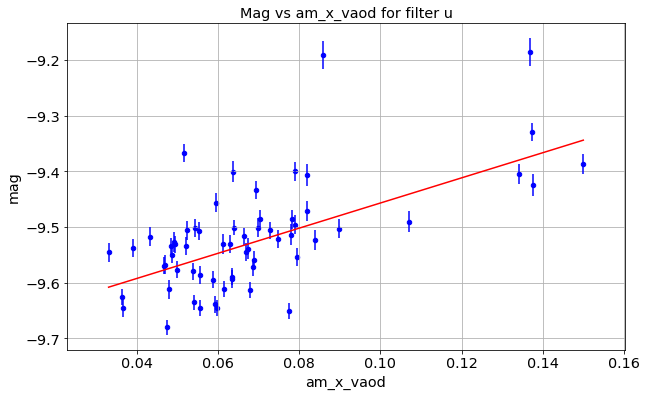

In [41]:
thedfu2.plot.scatter(x='am_x_vaod',y='mag',yerr='magerr',title='Mag vs am_x_vaod for filter u',color='b',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

# U Filter Clouds

In [42]:
theX=thedfu2["am_x_taugrey"].values
theY=thedfu2["mag"].values
theEY=thedfu2["magerr"].values

In [43]:
slope,intercept,rvalue,pvalue,stderr=linregress(theX,theY)

In [44]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

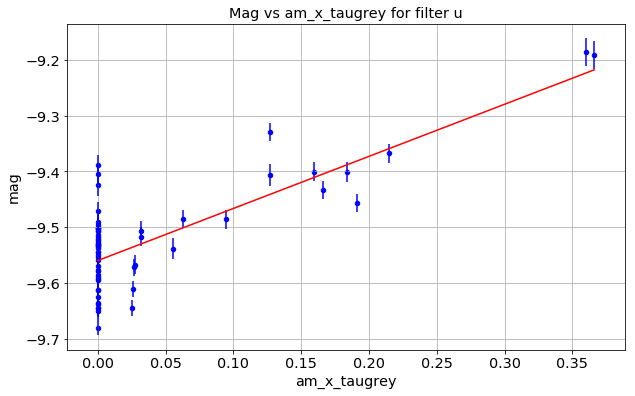

In [45]:
thedfu2.plot.scatter(x='am_x_taugrey',y='mag',yerr='magerr',title='Mag vs am_x_taugrey for filter u',color='b',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

# Ozone

In [46]:
theX=thedfu2["am_x_ozone"].values
theY=thedfu2["mag"].values
theEY=thedfu2["magerr"].values

In [47]:
slope,intercept,rvalue,pvalue,stderr=linregress(theX,theY)

In [48]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

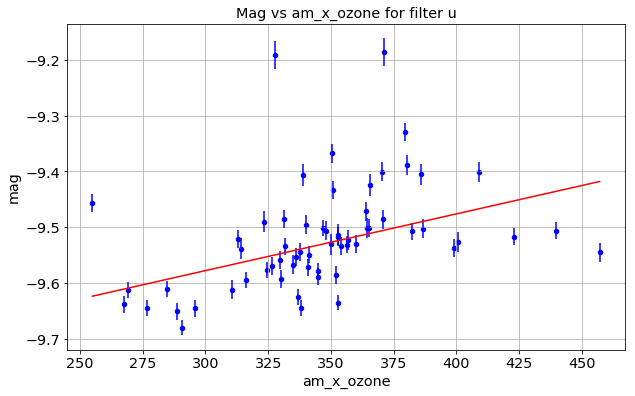

In [49]:
thedfu2.plot.scatter(x='am_x_ozone',y='mag',yerr='magerr',title='Mag vs am_x_ozone for filter u',color='b',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

# U filter : PWV

In [50]:
theX=thedfu2["am_x_pwv"].values
theY=thedfu2["mag"].values
theEY=thedfu2["magerr"].values

In [51]:
slope,intercept,rvalue,pvalue,stderr=linregress(theX,theY)

In [52]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

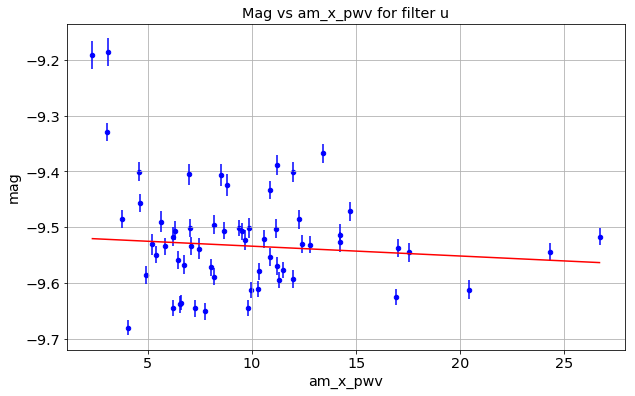

In [53]:
thedfu2.plot.scatter(x='am_x_pwv',y='mag',yerr='magerr',title='Mag vs am_x_pwv for filter u',color='b',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

## Four plots

In [198]:
def ShowCorrelationPlots(thedff,infototitle,color1='b',color2='r'):
    fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,12))
    #VAOD
    m,sig,themin,themax=thedff["am_x_vaod"].describe()["mean"], \
        thedff["am_x_vaod"].describe()["std"],thedff["am_x_vaod"].describe()["min"],thedff["am_x_vaod"].describe()["max"]
    theX=thedff["am_x_vaod"].values
    theY=thedff["mag"].values
    theEY=thedff["magerr"].values
    theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
    pol = np.poly1d(theZ)
    Xfit=np.linspace(theX.min(),theX.max(),50)
    Yfit=pol(Xfit)
    slope,intercept,rvalue,pvalue,stderr=linregress(theX,theY)
    nbsig=norm.ppf(1-pvalue)
    print("pvalue = {}, sigmas={}".format(pvalue,nbsig))
    statinfo="pvalue = {:3.2g}, $\sigma$ = {:2.1f}".format(pvalue,nbsig)
    thetitle="Mag vs Z x VAOD, stat: {} ".format(statinfo)
    thedff.plot.scatter(x='am_x_vaod',y='mag',yerr='magerr',title=thetitle,ax=axes[0,0],color=color1,marker='o',grid=True)
    axes[0,0].plot(Xfit,Yfit,'-',color=color2)
    #CLOUDS
    m,sig,themin,themax=thedff["am_x_taugrey"].describe()["mean"], \
        thedff["am_x_taugrey"].describe()["std"],thedff["am_x_taugrey"].describe()["min"],thedff["am_x_taugrey"].describe()["max"]
    theX=thedff["am_x_taugrey"].values
    theY=thedff["mag"].values
    theEY=thedff["magerr"].values
    theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
    pol = np.poly1d(theZ)
    Xfit=np.linspace(theX.min(),theX.max(),50)
    Yfit=pol(Xfit)
    slope,intercept,rvalue,pvalue,stderr=linregress(theX,theY)
    nbsig=norm.ppf(1-pvalue)
    print("pvalue = {}, sigmas={}".format(pvalue,nbsig))
    statinfo="pvalue = {:3.2g}, $\sigma$ = {:2.1f}".format(pvalue,nbsig)
    thetitle="Mag vs Z x taugrey, stat: {} ".format(statinfo)
    thedff.plot.scatter(x='am_x_taugrey',y='mag',yerr='magerr',title=thetitle,ax=axes[1,0],color=color1,marker='o',grid=True)
    axes[1,0].plot(Xfit,Yfit,"-",color=color2)
    #OZONE
    m,sig,themin,themax=thedff["am_x_ozone"].describe()["mean"], \
        thedff["am_x_ozone"].describe()["std"],thedff["am_x_ozone"].describe()["min"],thedff["am_x_ozone"].describe()["max"]
    theX=thedff["am_x_ozone"].values
    theY=thedff["mag"].values
    theEY=thedff["magerr"].values
    theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
    pol = np.poly1d(theZ)
    Xfit=np.linspace(theX.min(),theX.max(),50)
    Yfit=pol(Xfit)
    slope,intercept,rvalue,pvalue,stderr=linregress(theX,theY)
    nbsig=norm.ppf(1-pvalue)
    print("pvalue = {}, sigmas={}".format(pvalue,nbsig))
    statinfo="pvalue = {:3.2g}, $\sigma$ = {:2.1f}".format(pvalue,nbsig)
    thetitle="Mag vs Z x ozone, stat: {} ".format(statinfo)
    thedff.plot.scatter(x='am_x_ozone',y='mag',yerr='magerr',title=thetitle,ax=axes[0,1],color=color1,marker='o',grid=True)
    axes[0,1].plot(Xfit,Yfit,"-",color=color2)
    #PWV
    m,sig,themin,themax=thedff["am_x_pwv"].describe()["mean"], \
        thedff["am_x_pwv"].describe()["std"],thedff["am_x_pwv"].describe()["min"],thedff["am_x_pwv"].describe()["max"]
    theX=thedff["am_x_pwv"].values
    theY=thedff["mag"].values
    theEY=thedff["magerr"].values
    theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
    pol = np.poly1d(theZ)
    Xfit=np.linspace(theX.min(),theX.max(),50)
    Yfit=pol(Xfit)
    slope,intercept,rvalue,pvalue,stderr=linregress(theX,theY)
    nbsig=norm.ppf(1-pvalue)
    print("pvalue = {}, sigmas={}".format(pvalue,nbsig))
    statinfo="pvalue = {:3.2g}, $\sigma$ = {:2.1f}".format(pvalue,nbsig)
    thetitle="Mag vs Z x pwv, stat: {} ".format(statinfo)
    thedff.plot.scatter(x='am_x_pwv',y='mag',yerr='magerr',title=thetitle,ax=axes[1,1],color=color1,marker='o',grid=True)
    axes[1,1].plot(Xfit,Yfit,"-",color=color2)    
    fig.suptitle(infototitle,fontsize=25,fontweight='bold')

pvalue = 5.371925967995361e-08, sigmas=5.313671000986066
pvalue = 1.0277168758750273e-13, sigmas=7.345094805892056
pvalue = 0.0016652158795065401, sigmas=2.935469662616817
pvalue = 0.11395186099133854, sigmas=1.2057763883887158


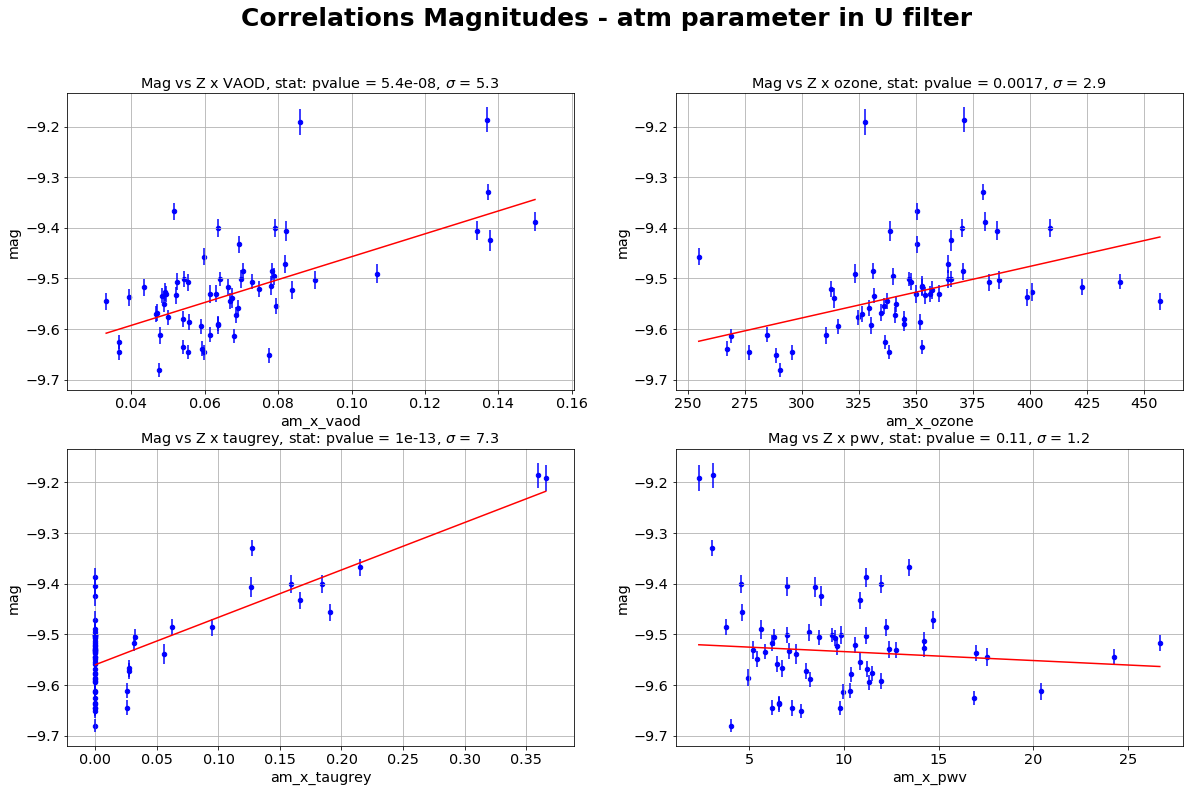

In [200]:
ShowCorrelationPlots(thedfu2,infototitle='Correlations Magnitudes - atm parameter in U filter',color1='blue',color2='red')


In [201]:
thedfu3=thedfu2.drop(['magerr'],axis=1)

In [202]:
corr=thedfu3.loc[(thedf.f == 1) ].corr()

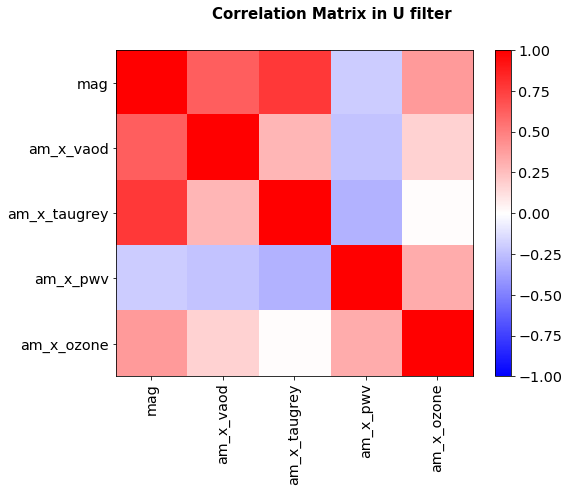

In [206]:
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='bwr', interpolation='none', aspect='auto',vmin=-1,vmax=+1)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation Matrix in U filter', fontsize=15, fontweight='bold')
plt.show()

# G filter

In [207]:
thedfg=thedf.loc[(thedf.f == 2)].drop('f', axis=1)

In [208]:
thedfg["am_x_vaod"]=thedfg["vaod"]*thedfg["am"]
thedfg["tau_grey"]=-np.log(thedfg["clouds"])
thedfg["am_x_taugrey"]=thedfg["tau_grey"]*thedfg["am"]
thedfg["am_x_pwv"]=thedfg["pwv"]*thedfg["am"]
thedfg["am_x_ozone"]=thedfg["ozone"]*thedfg["am"]

In [209]:
thedfg2=thedfg

In [220]:
thedfg2=thedfg2.drop(['am','vaod','clouds','pwv','ozone','tau_grey'],axis=1)

ValueError: labels ['am' 'vaod' 'clouds' 'pwv' 'ozone' 'tau_grey'] not contained in axis

pvalue = 0.03528962311324899, sigmas=1.8081751416351137
pvalue = 5.056321023222103e-39, sigmas=inf
pvalue = 0.010129768637372059, sigmas=2.321506248107334
pvalue = 0.9338324160833826, sigmas=-1.5049568615815532


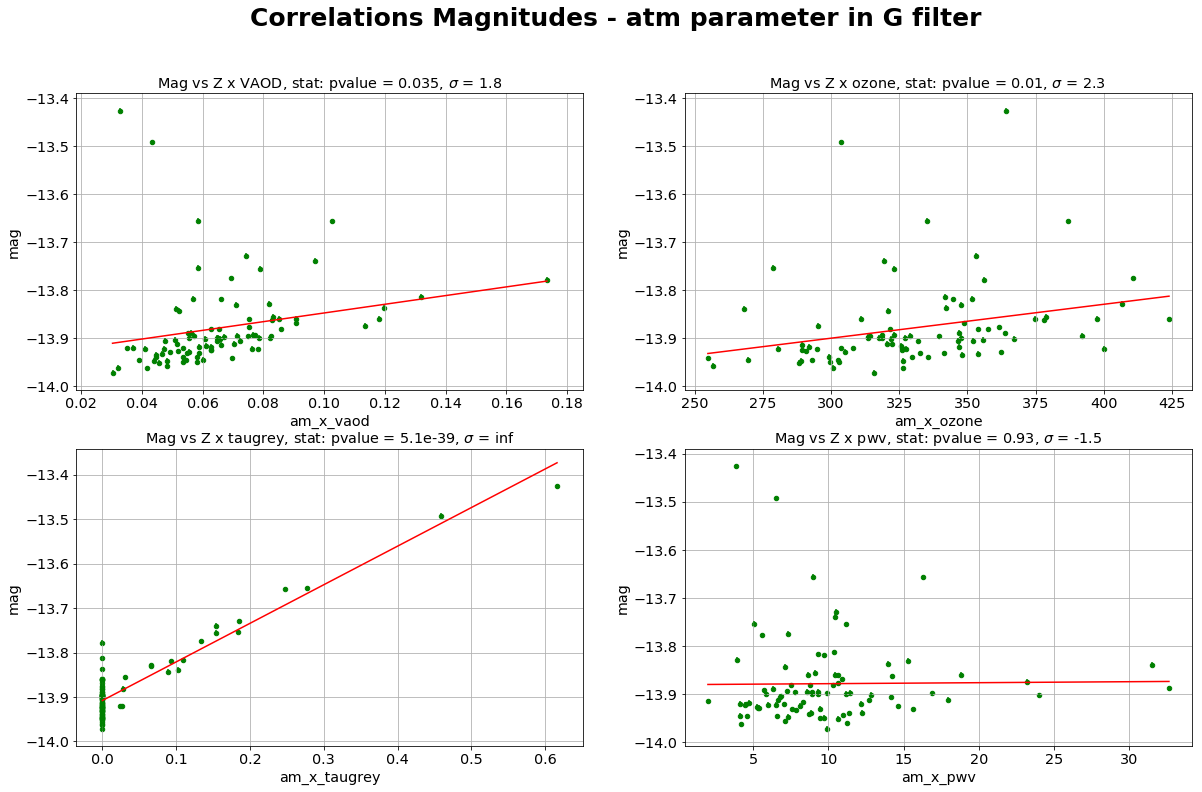

In [211]:
ShowCorrelationPlots(thedfg2,infototitle='Correlations Magnitudes - atm parameter in G filter',color1='green',color2='red')

In [212]:
thedfg3=thedfg2.drop(['magerr'],axis=1)

In [214]:
corr=thedfg3.corr()

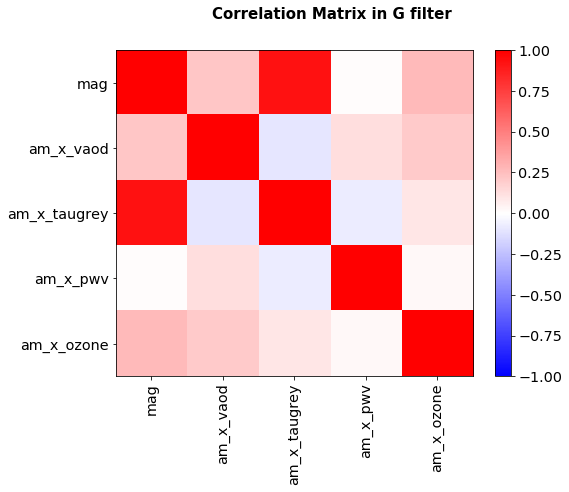

In [215]:
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='bwr', interpolation='none', aspect='auto',vmin=-1,vmax=+1)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation Matrix in G filter', fontsize=15, fontweight='bold')
plt.show()

# R filter

In [216]:
thedfr=thedf.loc[(thedf.f == 3)].drop('f', axis=1)

In [217]:
thedfr["am_x_vaod"]=thedfr["vaod"]*thedfr["am"]
thedfr["tau_grey"]=-np.log(thedfr["clouds"])
thedfr["am_x_taugrey"]=thedfr["tau_grey"]*thedfr["am"]
thedfr["am_x_pwv"]=thedfr["pwv"]*thedfr["am"]
thedfr["am_x_ozone"]=thedfr["ozone"]*thedfr["am"]

In [218]:
thedfr2=thedfr

In [219]:
thedfr2=thedfr2.drop(['am','vaod','clouds','pwv','ozone','tau_grey'],axis=1)

pvalue = 0.0004987725836132627, sigmas=3.2912181674531484
pvalue = 4.370344700798542e-125, sigmas=inf
pvalue = 0.14507151557557235, sigmas=1.0578078984235355
pvalue = 0.7066340960424705, sigmas=-0.5435781371361501


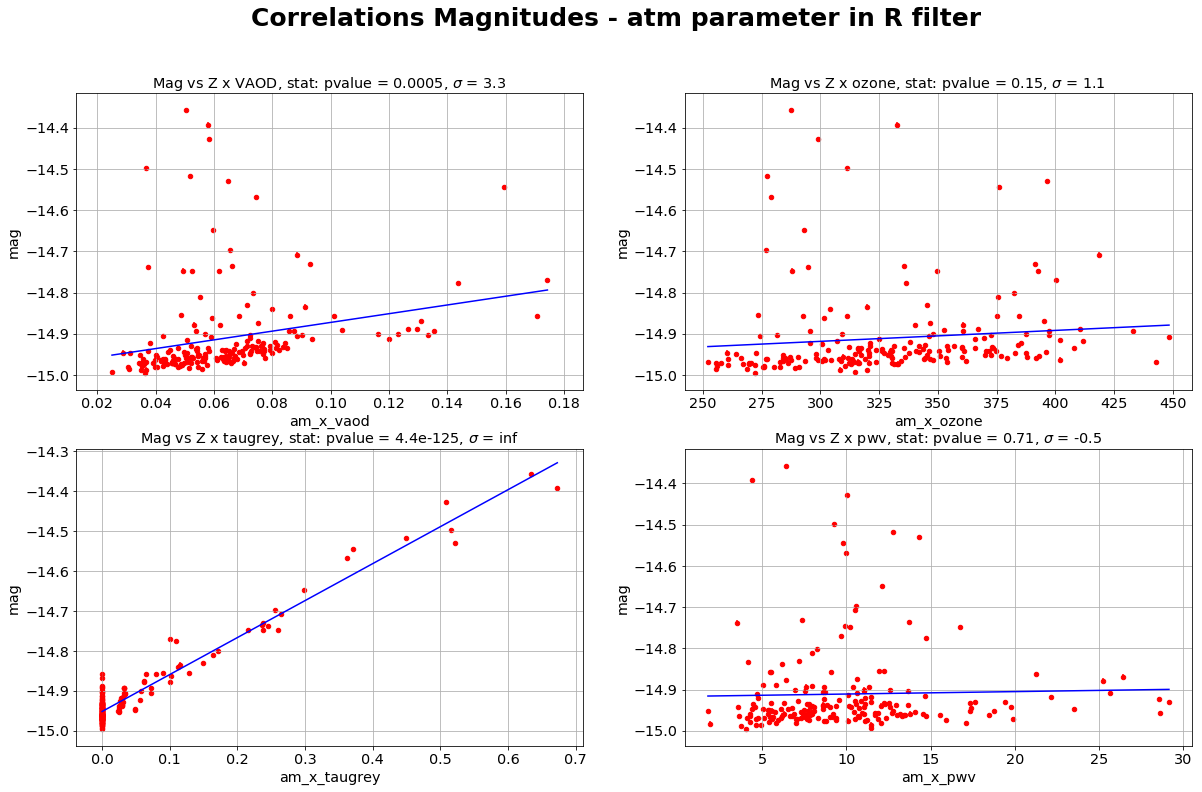

In [221]:
ShowCorrelationPlots(thedfr2,infototitle='Correlations Magnitudes - atm parameter in R filter',color1='red',color2='blue')

In [222]:
thedfr3=thedfr2.drop(['magerr'],axis=1)

In [223]:
corr=thedfr3.corr()

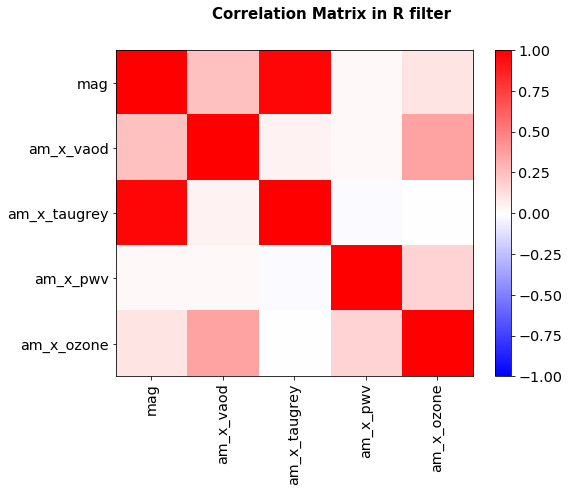

In [224]:
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='bwr', interpolation='none', aspect='auto',vmin=-1,vmax=+1)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation Matrix in R filter', fontsize=15, fontweight='bold')
plt.show()

# Filter I

In [225]:
thedfi=thedf.loc[(thedf.f == 4)].drop('f', axis=1)

In [226]:
thedfi["am_x_vaod"]=thedfi["vaod"]*thedfi["am"]
thedfi["tau_grey"]=-np.log(thedfi["clouds"])
thedfi["am_x_taugrey"]=thedfi["tau_grey"]*thedfi["am"]
thedfi["am_x_pwv"]=thedfi["pwv"]*thedfi["am"]
thedfi["am_x_ozone"]=thedfi["ozone"]*thedfi["am"]

In [227]:
thedfi2=thedfi

In [228]:
thedfi2=thedfi2.drop(['am','vaod','clouds','pwv','ozone','tau_grey'],axis=1)

pvalue = 0.5630938699431127, sigmas=-0.1588180085597332
pvalue = 1.2044121324975715e-163, sigmas=inf
pvalue = 0.9072565102646409, sigmas=-1.3240483743387477
pvalue = 0.1861418461474704, sigmas=0.8922038251412158


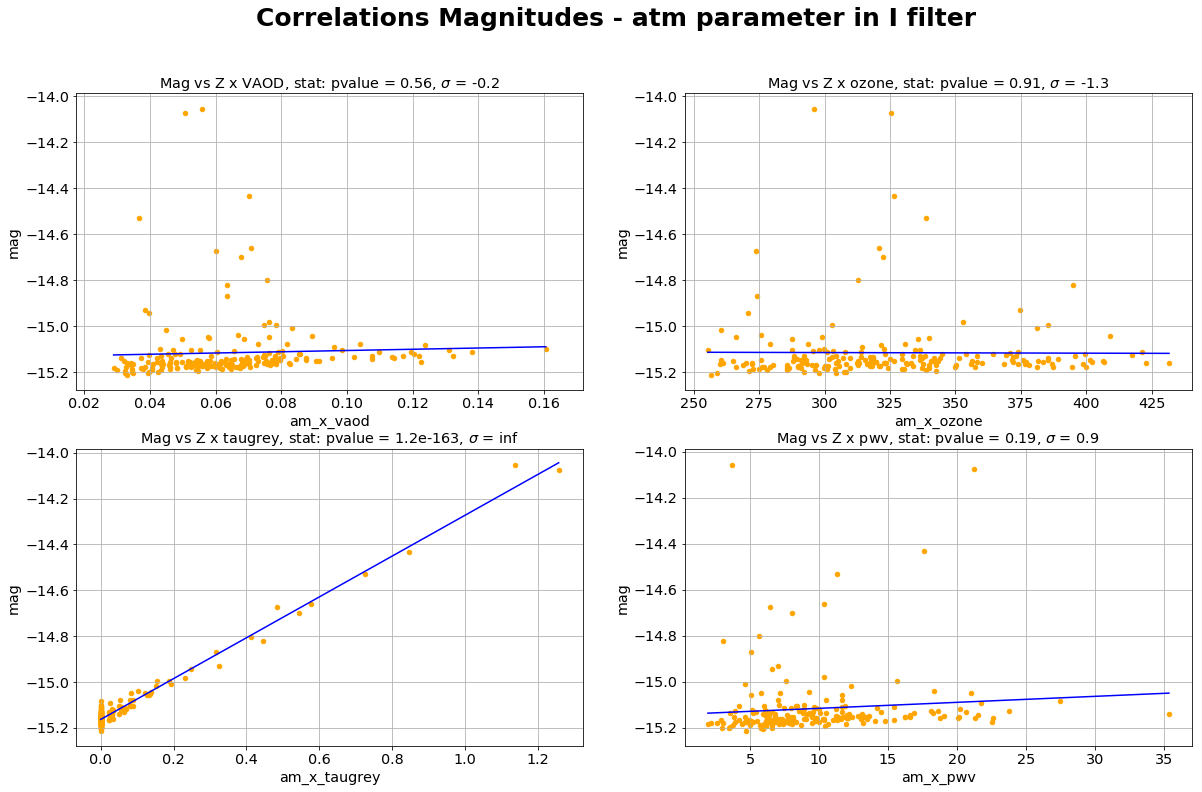

In [229]:
ShowCorrelationPlots(thedfi2,infototitle='Correlations Magnitudes - atm parameter in I filter',color1='orange',color2='blue')

In [230]:
thedfi3=thedfi2.drop(['magerr'],axis=1)

In [231]:
corr=thedfi3.corr()

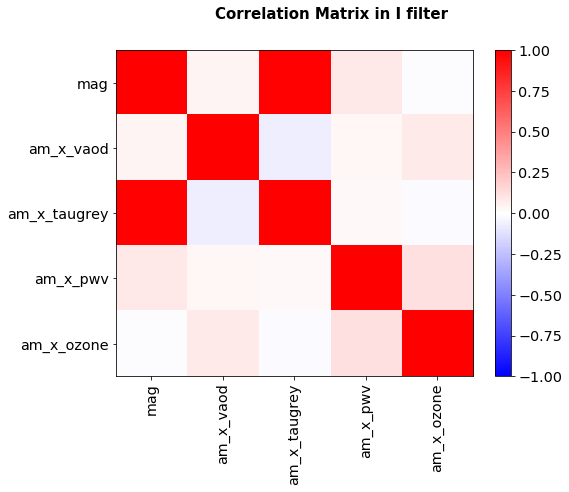

In [232]:
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='bwr', interpolation='none', aspect='auto',vmin=-1,vmax=+1)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation Matrix in I filter', fontsize=15, fontweight='bold')
plt.show()

# Z filter

In [233]:
thedfz=thedf.loc[(thedf.f == 5)].drop('f', axis=1)

In [234]:
thedfz["am_x_vaod"]=thedfz["vaod"]*thedfz["am"]
thedfz["tau_grey"]=-np.log(thedfz["clouds"])
thedfz["am_x_taugrey"]=thedfz["tau_grey"]*thedfz["am"]
thedfz["am_x_pwv"]=thedfz["pwv"]*thedfz["am"]
thedfz["am_x_ozone"]=thedfz["ozone"]*thedfz["am"]

In [235]:
thedfz2=thedfz

In [236]:
thedfz2=thedfz2.drop(['am','vaod','clouds','pwv','ozone','tau_grey'],axis=1)

pvalue = 0.000568716253342732, sigmas=3.2541224243028313
pvalue = 9.114296037706351e-104, sigmas=inf
pvalue = 0.5402982510513474, sigmas=-0.10118513349552158
pvalue = 0.005389589730238893, sigmas=2.549777155772624


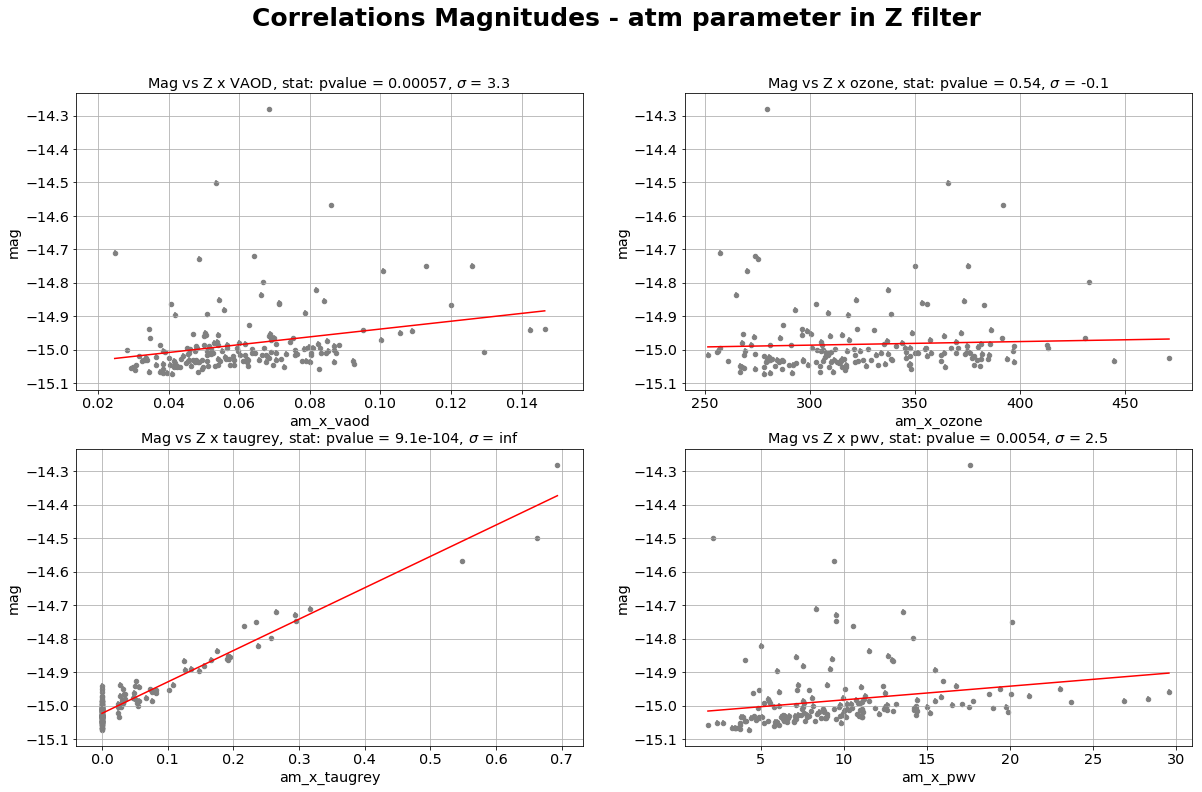

In [237]:
ShowCorrelationPlots(thedfz2,infototitle='Correlations Magnitudes - atm parameter in Z filter',color1='grey',color2='red')

In [238]:
thedfz3=thedfz2.drop(['magerr'],axis=1)

In [239]:
corr=thedfz3.corr()

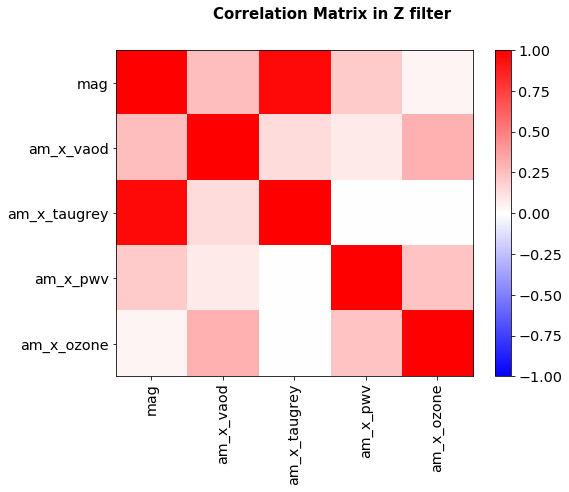

In [240]:
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='bwr', interpolation='none', aspect='auto',vmin=-1,vmax=+1)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation Matrix in Z filter', fontsize=15, fontweight='bold')
plt.show()

# Y filter

In [241]:
thedfy=thedf.loc[(thedf.f == 6)].drop('f', axis=1)

In [242]:
thedfy["am_x_vaod"]=thedfy["vaod"]*thedfy["am"]
thedfy["tau_grey"]=-np.log(thedfy["clouds"])
thedfy["am_x_taugrey"]=thedfy["tau_grey"]*thedfy["am"]
thedfy["am_x_pwv"]=thedfy["pwv"]*thedfy["am"]
thedfy["am_x_ozone"]=thedfy["ozone"]*thedfy["am"]

In [243]:
thedfy2=thedfy

In [244]:
thedfy2=thedfy2.drop(['am','vaod','clouds','pwv','ozone','tau_grey'],axis=1)

pvalue = 0.06338044442331991, sigmas=1.527000492734082
pvalue = 1.1458378133118554e-59, sigmas=inf
pvalue = 0.002311454304377009, sigmas=2.8321988747310756
pvalue = 1.7133807165482135e-11, sigmas=6.626957173473004


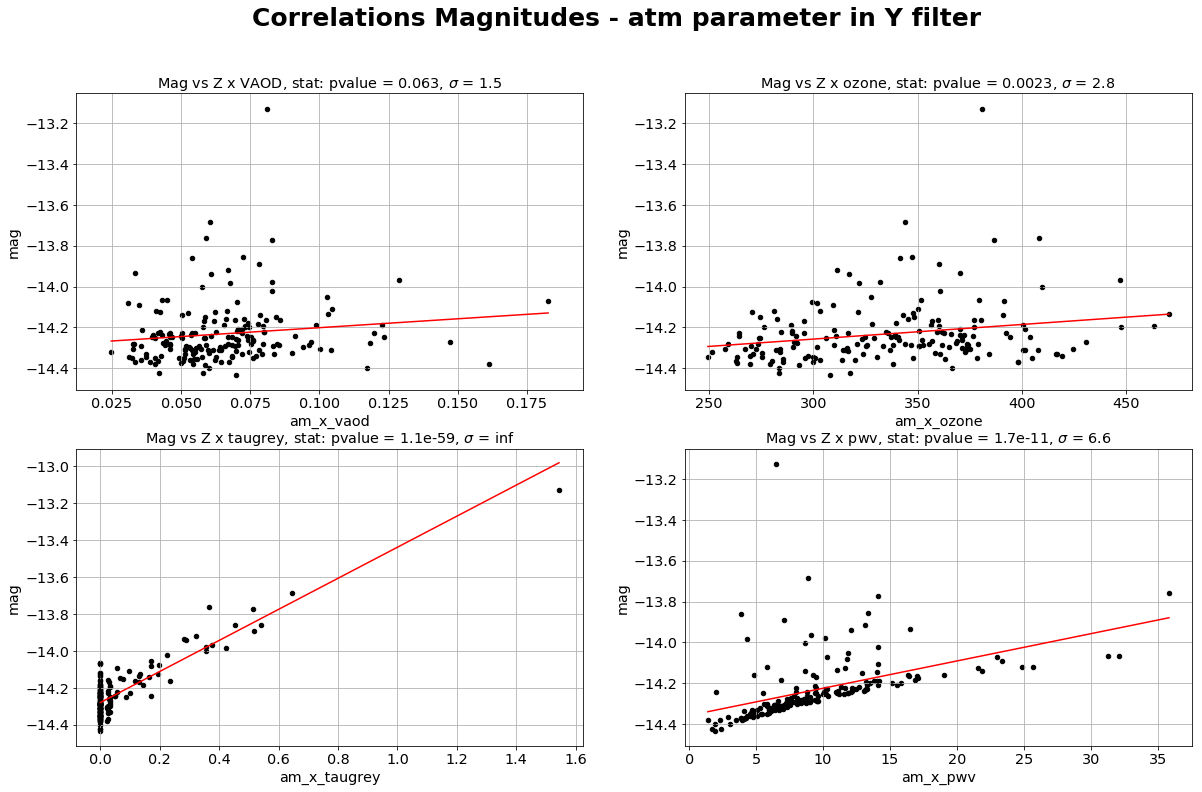

In [245]:
ShowCorrelationPlots(thedfy2,infototitle='Correlations Magnitudes - atm parameter in Y filter',color1='black',color2='red')

In [246]:
thedfy3=thedfy2.drop(['magerr'],axis=1)

In [247]:
corr=thedfy3.corr()

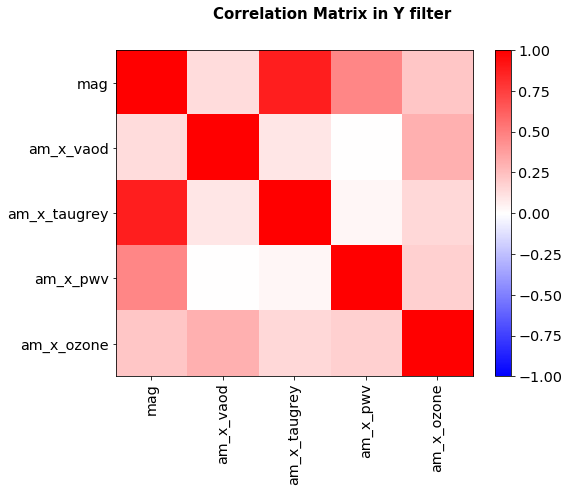

In [248]:
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='bwr', interpolation='none', aspect='auto',vmin=-1,vmax=+1)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation Matrix in Y filter', fontsize=15, fontweight='bold')
plt.show()